### 1. Výpočet tepové frekvence z EKG signálu

In [1]:
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- Tabulka obsahuje 3 sloupce:
  1. **Měření ECG_1001**
  2. **Tepová frekvence**
  3. **Procentuální míra detekce R peaků**
- Porovnání detekce R peaků mezi mými výsledky a výsledky od kolegy. Výsledky budou srovnány s anotacemi od experta.

- Každé měření je reprezentováno jako jeden vektor.
- Po načtení signálu je třeba provést následující kroky:
  - **Detrendování** signálu (odstranění trendů).
  - Ověření, že signál je **spojitý**.
  - **Centralizace** signálu, aby měl střed okolo nuly.
- Tyto kroky jsou součástí **preprocessingu EKG signálu**.

- **R Peak** (vrchol R): každý R peak odpovídá jednomu tepu srdce.
- Je nutné navrhnout spolehlivou metodu pro detekci R peaků, která:
  - Bude schopna identifikovat R peaky i v případech, kdy jsou méně výrazné nebo chybí.


In [ ]:
# Band-Pass Filtr (Pásmová propusť) - propustit ty signály, které nedávají smysl?
# 0.5 mV až 5 mV (500 µV až 5000 µV) - smysluplný fyziologický signál
# Pan–Tompkins algorithm

# 1. Zadání

,Informace,Hodnota
0,Název souboru,100001_ECG
1,Vzorkovací frekvence,1000
2,Délka signálu (vzorky),87087000
3,Počet kanálů,1
4,Názvy kanálů,ECG
5,Jednotky pro každý kanál,uV


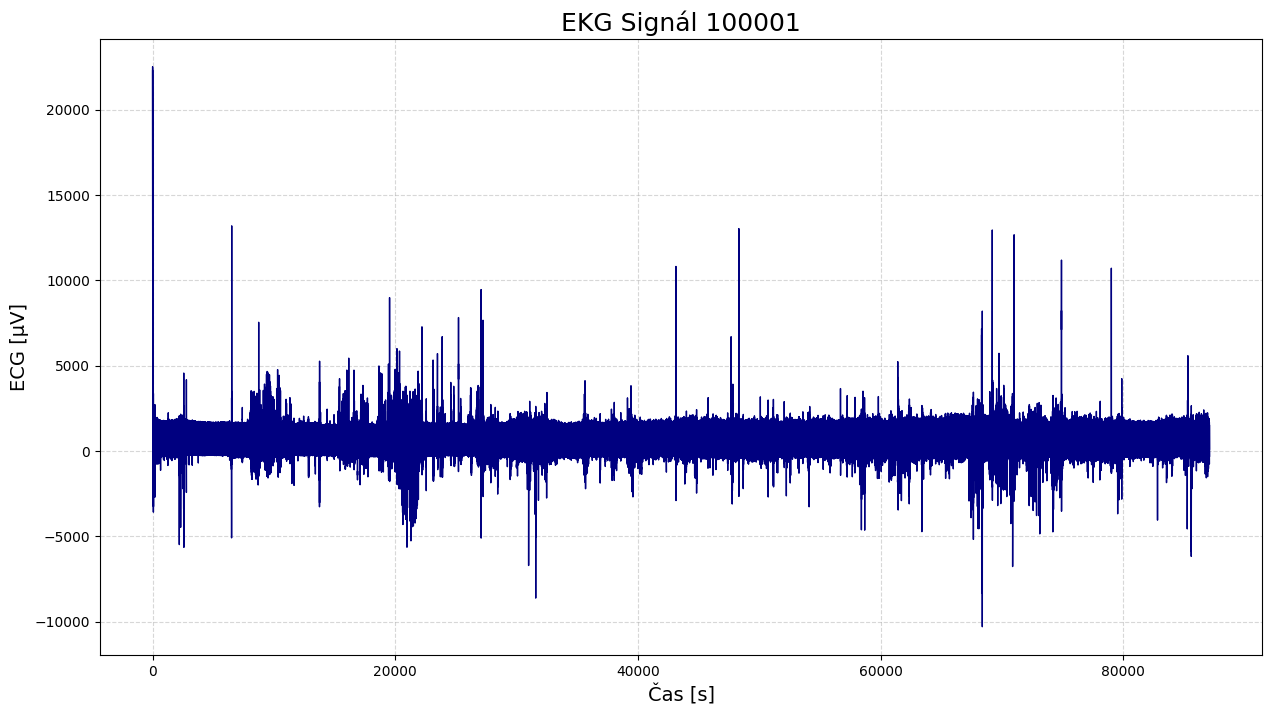

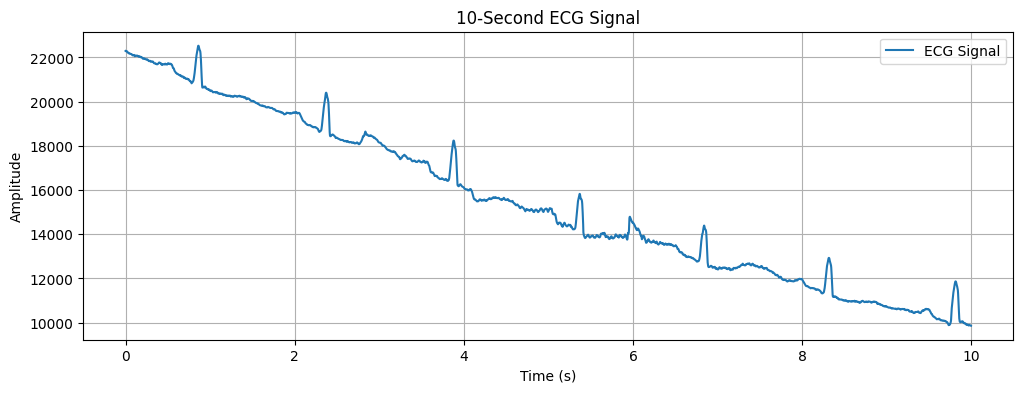

In [8]:
def load_ecg_signal(file_name):
    ecg_record = wfdb.rdrecord(file_name)
    return ecg_record


def display_signal_info(ecg_record):
    signal_info = [
        ["Název souboru", ecg_record.record_name],
        ["Vzorkovací frekvence", ecg_record.fs],
        ["Délka signálu (vzorky)", ecg_record.sig_len],
        ["Počet kanálů", ecg_record.n_sig],
        ["Názvy kanálů", ", ".join(ecg_record.sig_name)],
        ["Jednotky pro každý kanál", ", ".join(ecg_record.units)],
    ]

    info_df = pd.DataFrame(signal_info, columns=["Informace", "Hodnota"])
    display(info_df)


ecg_100001 = load_ecg_signal("100001_ECG")
display_signal_info(ecg_100001)

ecg_signal = ecg_100001.p_signal
sampling_frequency = 1000
time_axis = np.arange(len(ecg_signal)) / sampling_frequency

plt.figure(figsize=(15, 8))
plt.plot(time_axis, ecg_signal, color="navy", linewidth=1)
plt.title("EKG Signál 100001", fontsize=18)
plt.xlabel("Čas [s]", fontsize=14)
plt.ylabel("ECG [µV]", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Fs = 360
tmax = 10
ECGsignal = ecg_100001.p_signal[:, 0]
ECGsample = ECGsignal[0 : Fs * tmax]
time = [i / Fs for i in range(len(ECGsample))]

plt.figure(figsize=(12, 4))
plt.plot(time, ECGsample, label="ECG Signal")
plt.title("10-Second ECG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()